# **Installing EasyOCR to the Machine**

In [30]:
pip install easyocr

**Import Dependencies**

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import imutils

import easyocr

In [32]:
#load the images

image= cv2.imread('/content/R.png')

# **Filtering and Edge detection**
OpenCV

In [33]:
import cv2

# Assuming you have an image loaded and stored in the variable 'image'
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
filter = cv2.bilateralFilter(gray, 11, 17, 17)
edge = cv2.Canny(filter, 30, 200)


In [34]:
filter= cv2.bilateralFilter(gray, 11,17,17)
edge= cv2.Canny(filter, 30,200)

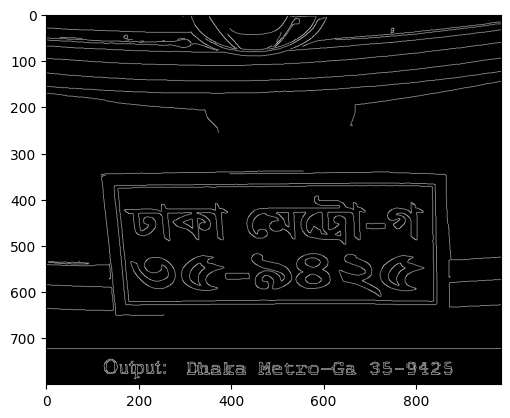

In [35]:
#Converting color

plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

**Extracting Counters**

In [36]:
ext_count= cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours= imutils.grab_contours(ext_count)
contours= sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [37]:
location= None

for contour in contours:
    apprx= cv2.approxPolyDP(
        contour, 10, True)

    if len(apprx)==4:
      location=apprx

      break

In [38]:
location

array([[[841, 368]],

       [[147, 371]],

       [[171, 626]],

       [[843, 628]]], dtype=int32)

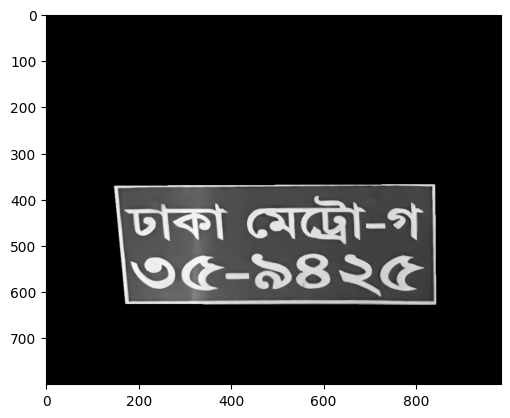

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your image and defined the variable 'gray'
# Assuming you have the contour location stored in the variable 'location'

# Create a mask
msk = np.zeros(gray.shape, np.uint8)

# Draw contours on the mask
extracted_plate = cv2.drawContours(msk, [location], 0, 255, -1)

# Bitwise AND operation to extract the plate
extracted_plate = cv2.bitwise_and(gray, gray, mask=msk)

# Display the result
plt.imshow(extracted_plate, cmap='gray')
plt.show()


In [41]:
# Assuming you have the 'gray' image and 'location' variable defined
msk = np.zeros(gray.shape, np.uint8)
mask = cv2.drawContours(msk, [location], 0, 255, -1)


In [42]:
# Assuming you have the mask variable correctly defined
# (e.g., from the previous part of your code where you created the mask)

# (x, y) will contain the coordinates where the mask is equal to 255
(x, y) = np.where(mask == 255)

# Find the minimum and maximum values of x and y
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))

# Extract the region of interest from the 'gray' image
final_plate = gray[x1:x2 + 1, y1:y2 + 1]


In [43]:
(x, y)= np.where(mask==255)

(x1, y1)= (np.min(x), np.min(y))
(x2, y2)= (np.max(x), np.max(y))

final_plate= gray[x1:x2+1,
                  y1:y2+1]

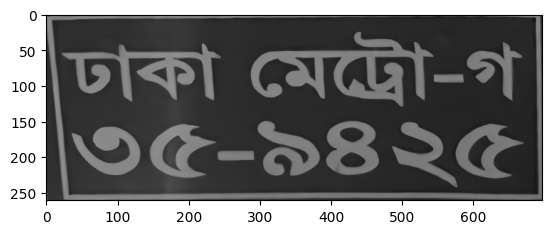

In [44]:
#final plate

plt.imshow(cv2.cvtColor(final_plate, cv2.COLOR_BGR2RGB))

# **Apply EasyOCR**

In [45]:
read_char= easyocr.Reader(['bn'])  #bangla character reading with 'bn'

detected= read_char.readtext(final_plate)  #read from final extracted plate

In [46]:
#show the detected number

detected

[([[17, 23], [678, 23], [678, 136], [17, 136]],
  'ঢাকা মেট্ট্রো-গ',
  0.4628276286536569),
 ([[35, 137], [681, 137], [681, 249], [35, 249]],
  '৩৫-৯৪২৫',
  0.6499734082527863)]